In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch

In [15]:
# Step 1: Load the Dataset
EastWestAirlines_df = pd.read_excel("C:\\Data science\\Assignments\\EastWestAirlines.xlsx")

# Sheet 2: data
data = pd.read_excel("C:\\Data science\\Assignments\\EastWestAirlines.xlsx", sheet_name='data')

In [17]:
print(data.head())

   ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [19]:
print(data.info)

<bound method DataFrame.info of         ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0

In [21]:
# Step 2: Data Preprocessing
# Handle missing values (if any)
data.ffill(inplace=True)  # Forward fill for missing values

In [27]:
# Remove outliers if necessary (Optional)
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=["ID"]))  # Excluding ID column

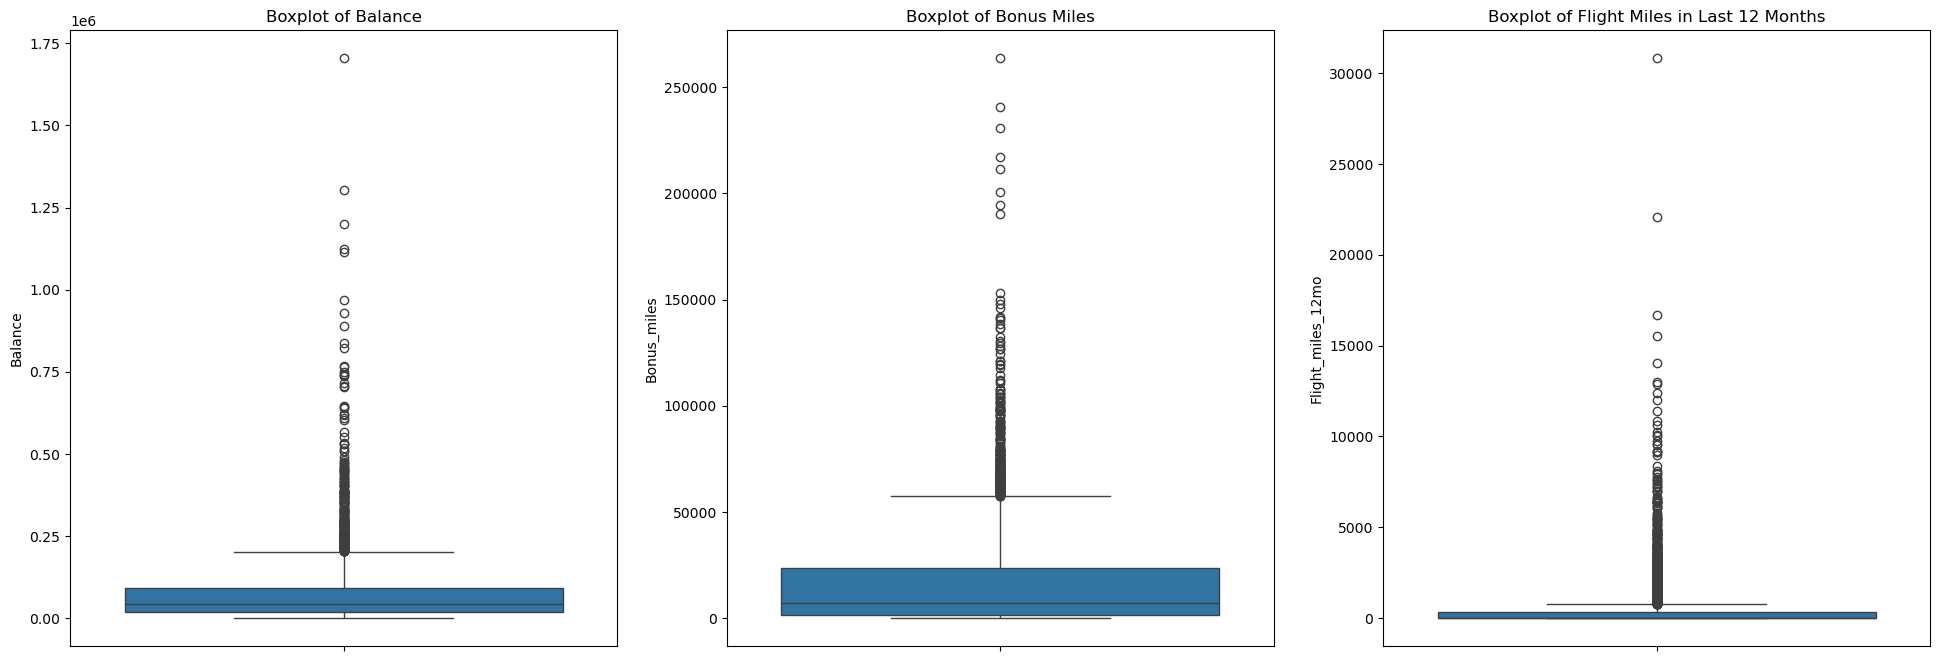

In [29]:
# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(24, 8))

# Boxplot to visualize outliers
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Balance'])
plt.title('Boxplot of Balance')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Bonus_miles'])
plt.title('Boxplot of Bonus Miles')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['Flight_miles_12mo'])
plt.title('Boxplot of Flight Miles in Last 12 Months')

plt.show()

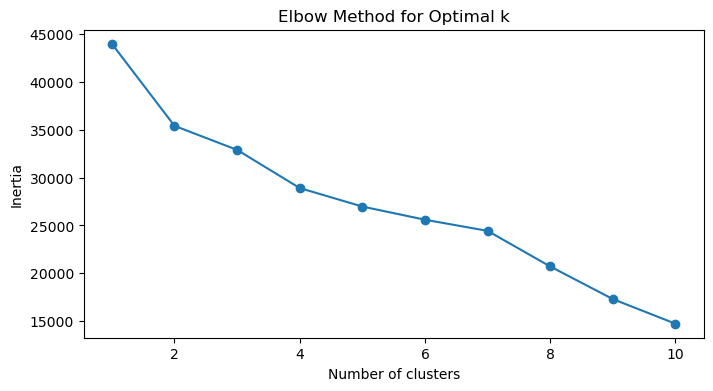

In [31]:
# Step 4: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Elbow Method to find optimal k
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

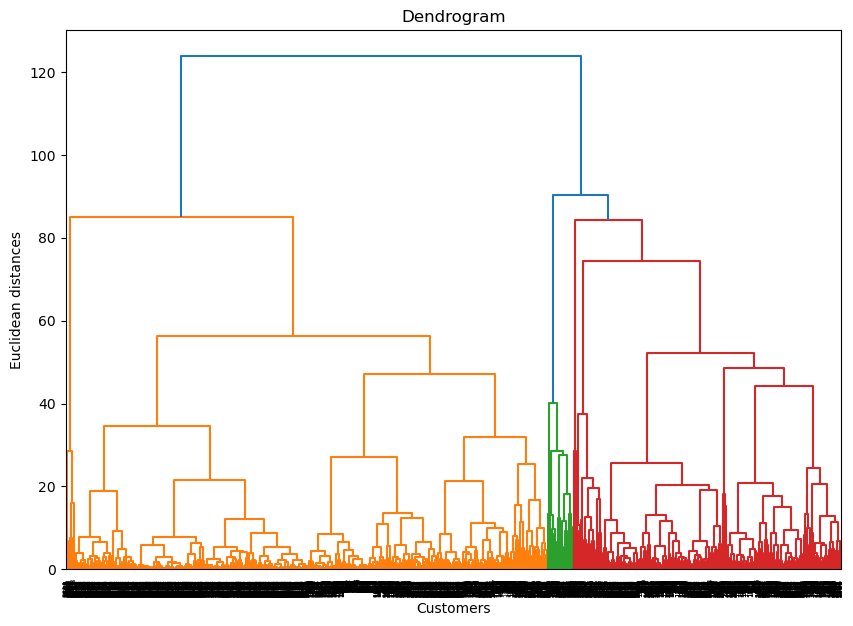

In [33]:
# Step 5: Hierarchical Clustering
# Create dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Applying Hierarchical Clustering
hc = linkage(scaled_data, method='ward')
hierarchical_clusters = fcluster(hc, t=3, criterion='maxclust')

In [34]:
# Step 6: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

In [35]:
# Step 7: Cluster Analysis and Interpretation
# Adding cluster labels to the original dataset
data['KMeans_Cluster'] = kmeans_clusters
data['Hierarchical_Cluster'] = hierarchical_clusters
data['DBSCAN_Cluster'] = dbscan_clusters

# Silhouette Score for K-Means and DBSCAN
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_clusters)

print(f'Silhouette Score for K-Means: {kmeans_silhouette}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')

Silhouette Score for K-Means: 0.2674062376813128
Silhouette Score for DBSCAN: -0.07834757831741164


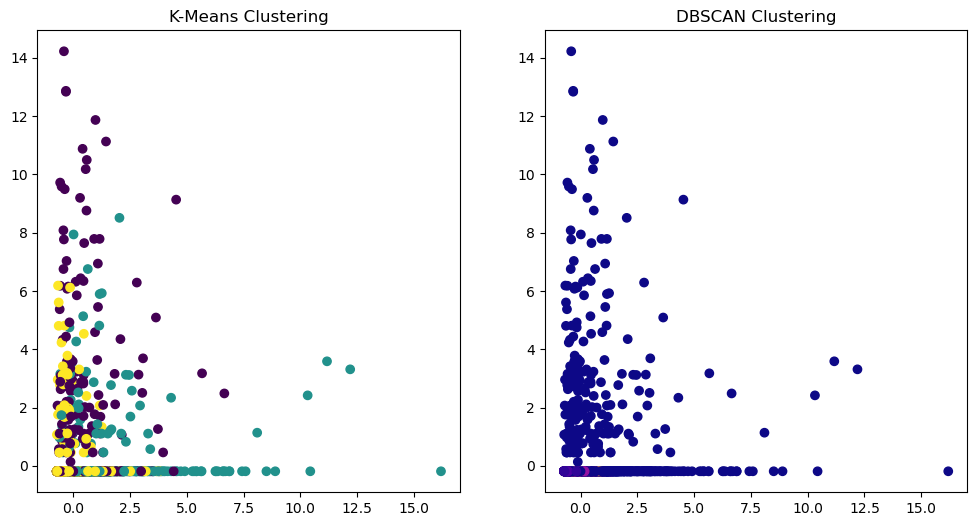

In [39]:
# Step 8: Visualization
plt.figure(figsize=(12, 6))

# K-Means Visualization
plt.subplot(1, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-Means Clustering')

# DBSCAN Visualization
plt.subplot(1, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_clusters, cmap='plasma')
plt.title('DBSCAN Clustering')

plt.show()